In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering
from google.colab import files
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [3]:
upload = files.upload() #Subida de archivo

Saving Datos_SI_Normalizado.xlsx to Datos_SI_Normalizado.xlsx


In [4]:
df = pd.read_excel(next(iter(upload))) #Lectura de archivo

In [5]:
feature = ['MONTO_PIM','MONTO_CERTIFICADO','MONTO_COMPROMETIDO_ANUAL','MONTO_COMPROMETIDO','MONTO_DEVENGADO','MONTO_GIRADO'] #Columnas del archivo
datos =df[feature]  #Asignación  de data

In [6]:
datos.head() #Muestra de los primeros 5 datos

,MONTO_PIM,MONTO_CERTIFICADO,MONTO_COMPROMETIDO_ANUAL,MONTO_COMPROMETIDO,MONTO_DEVENGADO,MONTO_GIRADO
0,0.000000,0.272117,0.245611,0.004004,0.006408,0.5
1,0.000000,0.272117,0.245611,0.004004,0.006408,0.5
2,0.000000,0.272117,0.245611,0.004004,0.006408,0.5
3,0.000014,0.272117,0.245611,0.004004,0.006408,0.5
4,0.000004,0.272117,0.245611,0.004004,0.006408,0.5


In [7]:
x = datos[['MONTO_CERTIFICADO','MONTO_DEVENGADO']] #Asignación de 2 columnas a x
x = x.head(1000) # Asignación de las primeras 1000 columas a x

In [8]:
x

,MONTO_CERTIFICADO,MONTO_DEVENGADO
0,0.272117,0.006408
1,0.272117,0.006408
2,0.272117,0.006408
3,0.272117,0.006408
4,0.272117,0.006408
...,...,...
995,0.272117,0.006408
996,0.272117,0.006408
997,0.272117,0.006408
998,0.272117,0.006408


In [9]:
y = datos['MONTO_GIRADO'] # Datos girados a y

In [10]:
y = y.head(1000) #Primeros 1000 datos a y

In [11]:
# Aplicar PCA para reducir la dimensionalidad
pca = PCA(n_components=2)  # Reducir a 2 componentes para visualización
x = pca.fit_transform(x) #transformar los componentes

In [12]:
n_clusters = 3 #numero de clusters

In [13]:
spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=0) #Clustering espectral con le número de cluster la matriz y la aleatoridad
labels = spectral_clustering.fit_predict(x)#predicciones

In [14]:
colormap=np.array(['Red','green','blue', 'purple', 'gray'])

<ipython-input-15-390330365bb4>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x[:, 0], x[:, 1], c=colormap[labels], cmap='viridis', marker='o')


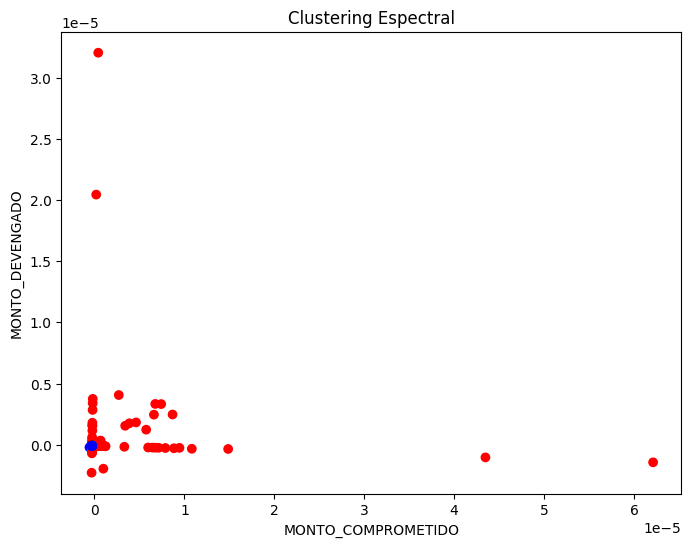

In [15]:
#Generación de grafica  con labels
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=colormap[labels], cmap='viridis', marker='o')
plt.title('Clustering Espectral')
plt.xlabel('MONTO_COMPROMETIDO')
plt.ylabel('MONTO_DEVENGADO')
plt.show()

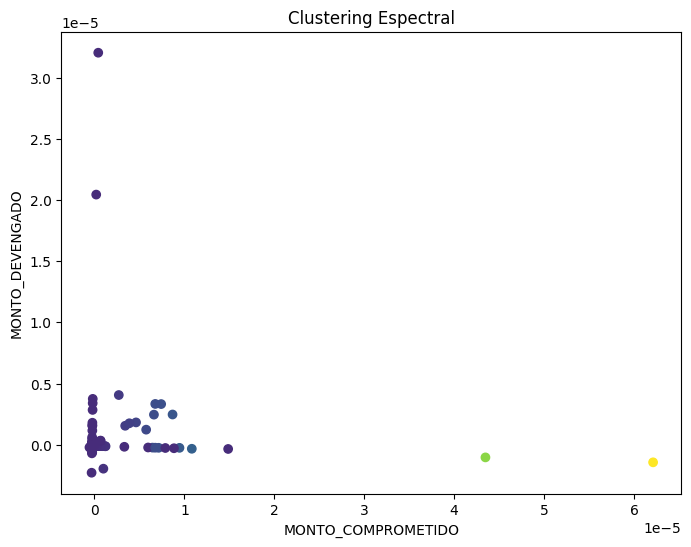

In [16]:
#Generación de grafica con y
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis', marker='o')
plt.title('Clustering Espectral')
plt.xlabel('MONTO_COMPROMETIDO')
plt.ylabel('MONTO_DEVENGADO')
plt.show()

In [17]:
#Indice de la silueta
silhouette_avg = silhouette_score(x, labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.19300841425444076
